In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#!git clone https://github.com/matterport/Mask_RCNN.git

In [3]:
%cd /content/drive/My Drive/Mask_RCNN

/content/drive/My Drive/Mask_RCNN


In [4]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/parallel_model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/__init__.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/visualize.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcnn
byte-compiling build/bdist.linux-x86_64/egg/mrcnn/parallel_model.py to p

In [5]:
!pip show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages/mask_rcnn-2.1-py3.6.egg
Requires: 
Required-by: 


In [6]:
!git clone https://github.com/experiencor/kangaroo.git

fatal: destination path 'kangaroo' already exists and is not an empty directory.


In [7]:
#https://github.com/matterport/Mask_RCNN/releases/download/v1.0/mask_rcnn_coco.h5

In [8]:
!pip install tensorflow==1.15
import tensorflow
print(tensorflow.__version__)

     |████████████████████████████████| 412.3MB 37kB/s 
     |████████████████████████████████| 3.8MB 36.7MB/s 
     |████████████████████████████████| 512kB 44.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=5e35f38d357144fc08bd0d60666ff56a92e661fccb9c3712fb5676ede8d49326
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: 

In [9]:
!pip install keras==2.2.5
import keras
print(keras.__version__)

     |████████████████████████████████| 337kB 2.8MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
2.2.5


Using TensorFlow backend.


In [10]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
class CarDataset(Dataset):
  def load_dataset(self,dataset_dir,is_train=True):
    self.add_class("dataset",1,"car")
    self.add_class("dataset",2,"scratch")
    images_dir=dataset_dir+'/carimg/'
    annotations_dir=dataset_dir+'/maskimg/'
    for filename in listdir(images_dir):
      image_id=filename[:-4]
      if(is_train and int(image_id)>=75):
        continue
      if not is_train and int(image_id)<75:
        continue
      img_path=images_dir+filename
      ann_path=annotations_dir+image_id+'.xml'
      self.add_image('dataset',image_id=image_id,path=img_path,annotation=ann_path)
  def extract_boxes(self,filename):
    tree=ElementTree.parse(filename)
    root=tree.getroot()
    boxes=list()
    names=list()
    ids=list()
    for box in root.findall('.//object'):
      xmin=int(box.find('xmin').text)
      ymin=int(box.find('ymin').text)
      xmax=int(box.find('xmax').text)
      ymax=int(box.find('ymax').text)
      name=str(root.find('.//object/name').text)
      if(name=='car'):
        ids.append(1)
      else:
        ids.append(2)
      coors=[xmin,ymin,xmax,ymax]
      boxes.append(coors)
      names.append(name)
    width=int(root.find('.//size/width').text)
    height=int(root.find('.//size/height').text)
    return boxes,width,height,names,ids
  def load_mask(self,image_id):
    info=self.image_info[image_id]
    path=info['annotation']
    boxes,w,h,names,ids=self.extract_boxes(path)
    masks=zeros([h,w,len(boxes)],dtype='uint8')
    class_ids=list()
    for i in range(len(boxes)):
      box=boxes[i]
      row_s,row_e=box[1],box[3]
      col_s,col_e=box[0],box[2]
      masks[row_s:row_e,col_s:col_e,i]=int(ids[i])
      class_ids.append(self.class_names.index(names[i]))
    return masks,asarray(class_ids,dtype='int32')
  def image_reference(self,image_id):
    info=self.image_info[image_id]
    return info['path']
train_set=CarDataset()
train_set.load_dataset('car2',is_train=True)
train_set.prepare()
print('Train: %d'%len(train_set.image_ids))
test_set=CarDataset()
test_set.load_dataset('car2',is_train=False)
test_set.prepare()
print('Test: %d'%len(test_set.image_ids))

Train: 74
Test: 36


1
57
100


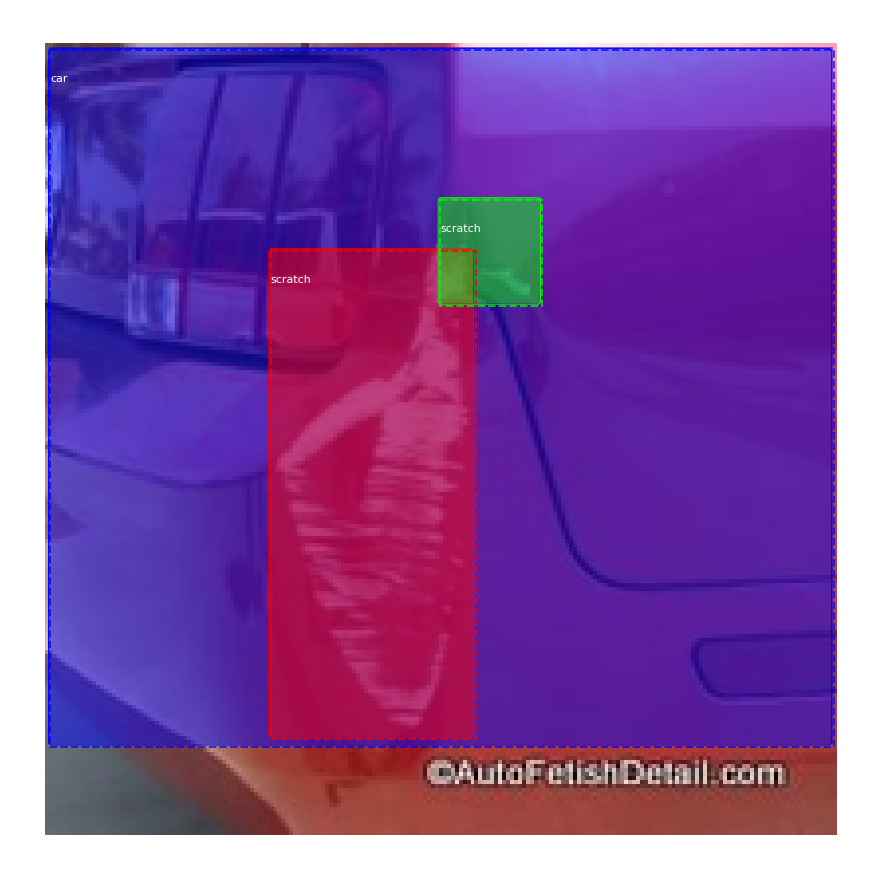

In [11]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes
class CarDataset(Dataset):
  def load_dataset(self,dataset_dir,is_train=True):
    self.add_class("dataset",1,"car")
    self.add_class("dataset",2,"scratch")
    images_dir=dataset_dir+'/carimg/'
    annotations_dir=dataset_dir+'/maskimg/'
    for filename in listdir(images_dir):
      image_id=filename[:-4]
      if(is_train and int(image_id)>=75):
        continue
      if not is_train and int(image_id)<75:
        continue
      img_path=images_dir+filename
      ann_path=annotations_dir+image_id+'.xml'
      self.add_image('dataset',image_id=image_id,path=img_path,annotation=ann_path)
  def extract_boxes(self,filename):
    tree=ElementTree.parse(filename)
    root=tree.getroot()
    boxes=list()
    names=list()
    ids=list()
    for box in root.findall('.//object'):
      xmin=int(box.find('.//bndbox/xmin').text)
      ymin=int(box.find('.//bndbox/ymin').text)
      xmax=int(box.find('.//bndbox/xmax').text)
      ymax=int(box.find('.//bndbox/ymax').text)
      name=str(box.find('name').text)
      print(xmin)
      coors=[xmin,ymin,xmax,ymax]
      boxes.append(coors)
      names.append(name)
    width=int(root.find('.//size/width').text)
    height=int(root.find('.//size/height').text)
    return boxes,width,height,names,ids
  def load_mask(self,image_id):
    info=self.image_info[image_id]
    path=info['annotation']
    boxes,w,h,names,ids=self.extract_boxes(path)
    masks=zeros([h,w,len(boxes)],dtype='uint8')
    class_ids=list()
    for i in range(len(boxes)):
      box=boxes[i]
      row_s,row_e=box[1],box[3]
      col_s,col_e=box[0],box[2]
      masks[row_s:row_e,col_s:col_e,i]=1#int(ids[i])
      class_ids.append(self.class_names.index(names[i]))
    return masks,asarray(class_ids,dtype='int32')
  def image_reference(self,image_id):
    info=self.image_info[image_id]
    return info['path']
train_set=CarDataset()
train_set.load_dataset('car2',is_train=True)
train_set.prepare()
image_id=40
image=train_set.load_image(image_id)
mask,class_ids=train_set.load_mask(image_id)
bbox=extract_bboxes(mask)
display_instances(image,bbox,mask,class_ids,train_set.class_names)

In [12]:
'''from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
class CarDataset(Dataset):
  def load_dataset(self,dataset_dir,is_train=True):
    self.add_class("dataset",1,"car")
    self.add_class("dataset",2,"scratch")
    images_dir=dataset_dir+'/carimg/'
    annotations_dir=dataset_dir+'/maskimg/'
    for filename in listdir(images_dir):
      image_id=filename[:-4]
      if(is_train and int(image_id)>=75):
        continue
      if not is_train and int(image_id)<75:
        continue
      img_path=images_dir+filename
      ann_path=annotations_dir+image_id+'.xml'
      self.add_image('dataset',image_id=image_id,path=img_path,annotation=ann_path)
  def extract_boxes(self,filename):
    tree=ElementTree.parse(filename)
    root=tree.getroot()
    boxes=list()
    names=list()
    ids=list()
    for box in root.findall('.//object'):
      xmin=int(box.find('.//bndbox/xmin').text)
      ymin=int(box.find('.//bndbox/ymin').text)
      xmax=int(box.find('.//bndbox/xmax').text)
      ymax=int(box.find('.//bndbox/ymax').text)
      name=str(box.find('name').text)
      print(xmin)
      coors=[xmin,ymin,xmax,ymax]
      boxes.append(coors)
      names.append(name)
    width=int(root.find('.//size/width').text)
    height=int(root.find('.//size/height').text)
    return boxes,width,height,names,ids
  def load_mask(self,image_id):
    info=self.image_info[image_id]
    path=info['annotation']
    boxes,w,h,names,ids=self.extract_boxes(path)
    masks=zeros([h,w,len(boxes)],dtype='uint8')
    class_ids=list()
    for i in range(len(boxes)):
      box=boxes[i]
      row_s,row_e=box[1],box[3]
      col_s,col_e=box[0],box[2]
      masks[row_s:row_e,col_s:col_e,i]=1#int(ids[i])
      class_ids.append(self.class_names.index(names[i]))
    return masks,asarray(class_ids,dtype='int32')
  def image_reference(self,image_id):
    info=self.image_info[image_id]
    return info['path']
class PersonConfig(Config):
  NAME="car2_cfg"
  NUM_CLASSES=1+2
  STEPS_PER_EPOCH=12
train_set=CarDataset()
train_set.load_dataset('car2',is_train=True)
train_set.prepare()
print('Train: %d'%len(train_set.image_ids))
test_set=CarDataset()
test_set.load_dataset('car2',is_train=False)
test_set.prepare()
print('Test: %d'%len(test_set.image_ids))
config=PersonConfig()
config.display()
model=MaskRCNN(mode='training',model_dir='./',config=config)
model.load_weights('/content/drive/My Drive/Mask_RCNN/mask_rcnn_coco.h5',by_name=True,
                   exclude=["mrcnn_class_logits","mrcnn_bbox_fc","mrcnn_bbox","mrcnn_mask"])
model.train(train_set,test_set,learning_rate=config.LEARNING_RATE,epochs=12,layers='heads')'''

'from os import listdir\nfrom xml.etree import ElementTree\nfrom numpy import zeros\nfrom numpy import asarray\nfrom mrcnn.utils import Dataset\nfrom mrcnn.config import Config\nfrom mrcnn.model import MaskRCNN\nclass CarDataset(Dataset):\n  def load_dataset(self,dataset_dir,is_train=True):\n    self.add_class("dataset",1,"car")\n    self.add_class("dataset",2,"scratch")\n    images_dir=dataset_dir+\'/carimg/\'\n    annotations_dir=dataset_dir+\'/maskimg/\'\n    for filename in listdir(images_dir):\n      image_id=filename[:-4]\n      if(is_train and int(image_id)>=75):\n        continue\n      if not is_train and int(image_id)<75:\n        continue\n      img_path=images_dir+filename\n      ann_path=annotations_dir+image_id+\'.xml\'\n      self.add_image(\'dataset\',image_id=image_id,path=img_path,annotation=ann_path)\n  def extract_boxes(self,filename):\n    tree=ElementTree.parse(filename)\n    root=tree.getroot()\n    boxes=list()\n    names=list()\n    ids=list()\n    for box in r

In [13]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from numpy import expand_dims
from numpy import mean
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.utils import Dataset
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
class PersonDataset(Dataset):
  def load_dataset(self,dataset_dir,is_train=True):
    self.add_class("dataset",1,"car")
    self.add_class("dataset",2,"scratch")
    images_dir=dataset_dir+'/carimg/'
    annotations_dir=dataset_dir+'/maskimg/'
    for filename in listdir(images_dir):
      image_id=filename[:-4]
      if(is_train and int(image_id)>=75):
        continue
      if not is_train and int(image_id)<75:
        continue
      img_path=images_dir+filename
      ann_path=annotations_dir+image_id+'.xml'
      self.add_image('dataset',image_id=image_id,path=img_path,annotation=ann_path)
  def extract_boxes(self,filename):
    tree=ElementTree.parse(filename)
    root=tree.getroot()
    boxes=list()
    names=list()
    ids=list()
    for box in root.findall('.//object'):
      xmin=int(box.find('.//bndbox/xmin').text)
      ymin=int(box.find('.//bndbox/ymin').text)
      xmax=int(box.find('.//bndbox/xmax').text)
      ymax=int(box.find('.//bndbox/ymax').text)
      name=str(box.find('name').text)
      print(xmin)
      coors=[xmin,ymin,xmax,ymax]
      boxes.append(coors)
      names.append(name)
    width=int(root.find('.//size/width').text)
    height=int(root.find('.//size/height').text)
    return boxes,width,height,names,ids
  def load_mask(self,image_id):
    info=self.image_info[image_id]
    path=info['annotation']
    boxes,w,h,names,ids=self.extract_boxes(path)
    masks=zeros([h,w,len(boxes)],dtype='uint8')
    class_ids=list()
    for i in range(len(boxes)):
      box=boxes[i]
      row_s,row_e=box[1],box[3]
      col_s,col_e=box[0],box[2]
      masks[row_s:row_e,col_s:col_e,i]=1#int(ids[i])
      class_ids.append(self.class_names.index(names[i]))
    return masks,asarray(class_ids,dtype='int32')
  def image_reference(self,image_id):
    info=self.image_info[image_id]
    return info['path']
class PredictionConfig(Config):
  NAME="car2_cfg"
  NUM_CLASSES=1+2
  GPU_COUNT=1
  IMAGES_PER_GPU=1
def evaluate_model(dataset,model,cfg):
  APs=list()
  for image_id in dataset.image_ids:
    image,image_meta,gt_class_id,gt_bbox,gt_mask=load_image_gt(dataset,cfg,image_id,use_mini_mask=False)
    scaled_image=mold_image(image,cfg)
    sample=expand_dims(scaled_image,0)
    yhat=model.detect(sample, verbose=0)
    r=yhat[0]
    AP, _, _, _=compute_ap(gt_bbox,gt_class_id,gt_mask,r["rois"],r["class_ids"],r["scores"],r['masks'])
    APs.append(AP)
  mAP=mean(APs)
  return mAP
train_set=PersonDataset()
train_set.load_dataset('car2',is_train=True)
train_set.prepare()
print("Train: %d"%len(train_set.image_ids))
test_set=PersonDataset()
test_set.load_dataset('car2',is_train=False)
test_set.prepare()
print("Test: %d"%len(test_set.image_ids))
cfg=PredictionConfig()
model=MaskRCNN(mode='inference',model_dir='./',config=cfg)
model.load_weights('/content/drive/My Drive/Mask_RCNN/car2_cfg20200629T1007/mask_rcnn_car2_cfg_0001.h5',
                   by_name=True)
train_mAP=evaluate_model(train_set,model,cfg)
print("Train mAP: %.3f"%train_mAP)
test_mAP=evaluate_model(test_set,model,cfg)
print("Test mAP: %.3f"%test_mAP)

Train: 74
Test: 36







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.






Re-starting from epoch 1
1
36


/content/drive/My Drive/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)


12
109


/content/drive/My Drive/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)


1
69


/content/drive/My Drive/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)


2
3


/content/drive/My Drive/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)


7
43
10
55
1
43
1
29
1
64
1
65
159
1
1
5
2
1
1
1
3
3
18
1
1
2
13
1
2
2
3


/content/drive/My Drive/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)


1
59
9
6


/content/drive/My Drive/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)


1
28
36
1


/content/drive/My Drive/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)


1
38
66
130
84


/content/drive/My Drive/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)


2
50
82


/content/drive/My Drive/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)


1
3


/content/drive/My Drive/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)


1
84
148
24
1
3
10
51
1
2


/content/drive/My Drive/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)


1
77
81
1
32
65
66
1
64
64
48
94
129
3
46
18
47
1
36
97
147
188
167
1
57
100
2
53
21
1
85
3
44
1
8
51
1
67
140
152
1
34
1
82
25
99
92
2
128
2
51
91
2
60
2
52
11
73
1
149
107
1
71
131
171
2
47
2
30
134
2
52
2
8
14
1
103
3
51
3
36
1
31
1
4
91
1
1
1
107
1
32
1
1
1
14
1
44
1
78
1
1
33
1
1
28
46
Train mAP: nan
1
1
4
1
1
17
1
1
71
1
1
91
1
1
9
1
1
42
1
1
1
6
1
1
54
1
2
2
1
16
1
20
1
1
1
1
1
94
1
2
1
81
1
81
2
3
1
105
2
26
1
60
1
77
79
1
50
1
59
28
1
33
1
1
Test mAP: 0.507


Train: 74
Test: 36
Re-starting from epoch 1
1
36


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.


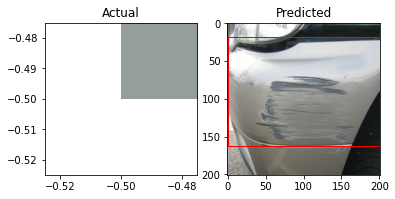

1


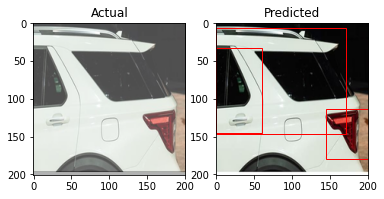

In [15]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from numpy import expand_dims
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.model import mold_image
from mrcnn.utils import Dataset
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
class PersonDataset(Dataset):
  def load_dataset(self,dataset_dir,is_train=True):
    self.add_class("dataset",1,"car")
    self.add_class("dataset",2,"scratch")
    images_dir=dataset_dir+'/carimg/'
    annotations_dir=dataset_dir+'/maskimg/'
    for filename in listdir(images_dir):
      image_id=filename[:-4]
      if(is_train and int(image_id)>=75):
        continue
      if not is_train and int(image_id)<75:
        continue
      img_path=images_dir+filename
      ann_path=annotations_dir+image_id+'.xml'
      self.add_image('dataset',image_id=image_id,path=img_path,annotation=ann_path)
  def extract_boxes(self,filename):
    tree=ElementTree.parse(filename)
    root=tree.getroot()
    boxes=list()
    names=list()
    ids=list()
    for box in root.findall('.//object'):
      xmin=int(box.find('.//bndbox/xmin').text)
      ymin=int(box.find('.//bndbox/ymin').text)
      xmax=int(box.find('.//bndbox/xmax').text)
      ymax=int(box.find('.//bndbox/ymax').text)
      name=str(box.find('name').text)
      print(xmin)
      coors=[xmin,ymin,xmax,ymax]
      boxes.append(coors)
      names.append(name)
    width=int(root.find('.//size/width').text)
    height=int(root.find('.//size/height').text)
    return boxes,width,height,names,ids
  def load_mask(self,image_id):
    info=self.image_info[image_id]
    path=info['annotation']
    boxes,w,h,names,ids=self.extract_boxes(path)
    masks=zeros([h,w,len(boxes)],dtype='uint8')
    class_ids=list()
    for i in range(len(boxes)):
      box=boxes[i]
      row_s,row_e=box[1],box[3]
      col_s,col_e=box[0],box[2]
      masks[row_s:row_e,col_s:col_e,i]=1#int(ids[i])
      class_ids.append(self.class_names.index(names[i]))
    return masks,asarray(class_ids,dtype='int32')
  def image_reference(self,image_id):
    info=self.image_info[image_id]
    return info['path']
class PredictionConfig(Config):
  NAME="car2_cfg"
  NUM_CLASSES=1+2
  GPU_COUNT=1
  IMAGES_PER_GPU=1
def plot_actual_vs_predicted(dataset,model,cfg,n_images=1):
  for i in range(n_images):
    image=dataset.load_image(i)
    mask,_=dataset.load_mask(i)
    scaled_image=mold_image(image,cfg)
    sample=expand_dims(scaled_image,0)
    yhat=model.detect(sample,verbose=0)[0]
    yhat1=model.detect(sample,verbose=0)
    pyplot.subplot(n_images,2,i*2+1)
    pyplot.imshow(image)
    pyplot.title('Actual')
    for j in range(mask.shape[2]):
      pyplot.imshow(mask[:,:,j],cmap='gray',alpha=0.3)
    pyplot.subplot(n_images,2,i*2+2)
    pyplot.imshow(image)
    pyplot.title('Predicted')
    ax = pyplot.gca()
    for box in yhat['rois']:
      y1,x1,y2,x2=box
      width,height=x2-x1,y2-y1
      rect=Rectangle((x1,y1),width,height,fill=False,color='red')
      ax.add_patch(rect)
  pyplot.show()
train_set=PersonDataset()
train_set.load_dataset('car2',is_train=True)
train_set.prepare()
print("Train: %d"%len(train_set.image_ids))
test_set=PersonDataset()
test_set.load_dataset('car2',is_train=False)
test_set.prepare()
print("Test: %d"%len(test_set.image_ids))
cfg=PredictionConfig()
model=MaskRCNN(mode='inference',model_dir='./',config=cfg)
model_path='/content/drive/My Drive/Mask_RCNN/car2_cfg20200629T1007/mask_rcnn_car2_cfg_0001.h5'
model.load_weights(model_path,by_name=True)
plot_actual_vs_predicted(train_set,model,cfg)
plot_actual_vs_predicted(test_set,model,cfg)

Processing 1 images
image                    shape: (95, 153, 3)          min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

*** No instances to display *** 



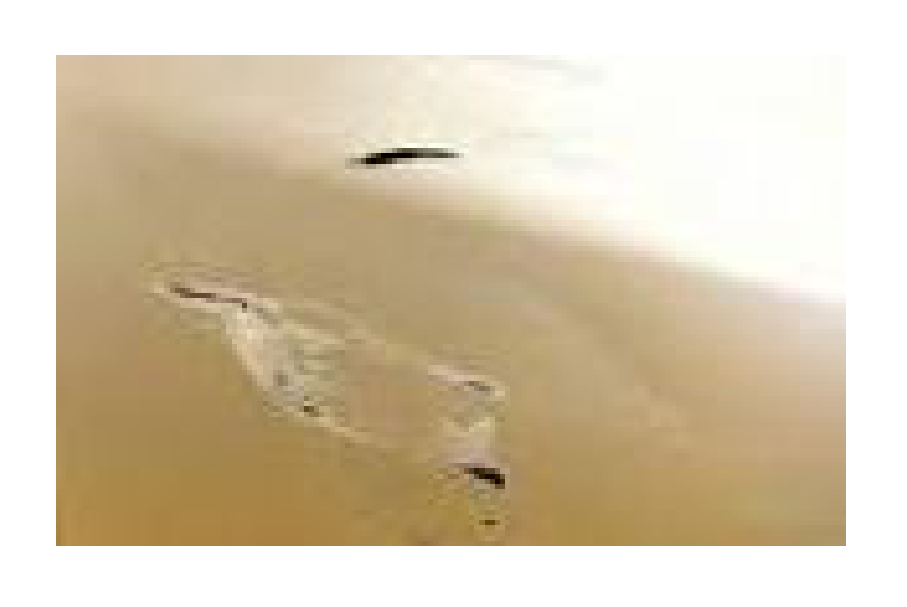

In [20]:
import skimage.io
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
class_names=['BG','car','scratch']
image=skimage.io.imread('/content/drive/My Drive/Mask_RCNN/tstimg.png')
results=model.detect([image],verbose=1)
r=results[0]
visualize.display_instances(image,r['rois'],r['masks'],r['class_ids'],class_names,r['scores'])